# CSINTSY - Machine Learning Model
### Title: Crop Recommendation Model

### Members: Cruzada, Escalona, Francisco, Loyola

### Section and Group CSINTSY S14 MCO5

---

## Introduction

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## Dataset

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## ML Methods used

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## References

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

# Experiment Proper

## 1. Importation and cleaning of data.

### 1.1 Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

### 1.2 Load Raw Data

The training data shows 8 unique columns which represent certain parameters. With the exception of the `label` parameter, these parameters are the environmental variables that are required in the growth of a certain crop which are the levels of `nitrogen`, `phosphorus`, `potassium`, `temperature` (in C), `humidity`, `ph`, and `rainfall`.

In [2]:
# Load Training data
crops_df = pd.read_csv('crops_dataset.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### 1.2.1 Determine Features

In [3]:
FEATURES = crops_df.keys().tolist()[0:-1]
FEATURES

['nitrogen',
 'phosphorus',
 'potassium',
 'temperature',
 'humidity',
 'ph',
 'rainfall']

#### 1.2.2 Determine Unique Crop Labels

In [4]:
#Determine the list of unique crops
labels = crops_df["label"].unique()
print("No. of unique crop labels: ", labels.size)
print(labels)

No. of unique crop labels:  23
['rice' 'rice`' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


### 1.3 Divide Training Data from Test Data

With a original dataset having 2200 rows or data points, it is possible to retrive at most 200 test samples to be used for testing with the remaining 2000 for training.

In [5]:
random_seed = 1 #Prevents the test_data from being 'too random' on different runtimes.
test_data = crops_df.sample(n=200, random_state=random_seed)
training_data = pd.concat([crops_df,test_data]).drop_duplicates(keep=False)

## 2. Use of Machine Learning

### 2.1 K Neighbor Clustering

**<< A brief explanation of K Neighbor Clustering >>**

#### 2.1.1 Loading Training and Test Data

Create separate copies of training and test data for exclusive use of K Neighbor Classifier

In [6]:
#Load training data
kn_training = training_data

# Load test data
kn_test = test_data

#### 2.1.2 Load and 'Train' K Neighbors Classifier

In [7]:
# Using the features, define what type of crop it is
x = kn_training[FEATURES].copy()
y = kn_training['label']

knn = KNeighborsClassifier(n_neighbors=3) #Uses number of labels
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

#### 2.1.3 Test Predictions

In [8]:
# The prediction column shows the prediction of the K Neighbor algo
kn_test['prediction'] = knn.predict(kn_test[FEATURES])
kn_test

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,prediction
1276,25,129,195,17.986678,81.177121,5.777271,72.371277,grapes,grapes
1446,106,20,51,29.730197,90.970157,6.342573,20.490356,muskmelon,muskmelon
335,33,59,22,22.642369,21.593961,5.947000,122.388601,kidneybeans,kidneybeans
1458,89,9,47,29.471563,90.770696,6.668383,28.752261,muskmelon,muskmelon
2038,62,49,37,24.217446,82.852840,7.479248,166.136589,jute,jute
...,...,...,...,...,...,...,...,...,...
614,21,38,21,29.755389,86.451933,6.637677,37.546027,mungbean,mungbean
885,28,67,21,21.797926,63.730861,6.250994,46.623702,lentil,lentil
1259,17,136,195,41.207336,81.610510,6.389783,65.902275,grapes,grapes
2067,66,58,35,23.564383,79.462831,7.321619,185.259470,jute,jute


#### 2.1.4 Check Predictions

In [9]:
#Count the number of correctly labelled predictions
count = 0
for index, row in kn_test.iterrows():
    if row['label'] == row['prediction']:
        count += 1
print("Correct Predictions: {count:d}/{total:d} ({rate:.2f})".format(count=count, total=len(kn_test), rate=count/len(kn_test)))

Correct Predictions: 199/200 (0.99)


### 2.2 Decision Trees

#### 2.2.1 Loading Training and Test Data

Create separate copies of training and test data for exclusive use of Decision Trees

In [10]:
#Load training data
tree_df = crops_df

#### 2.2.2 Load and 'Train' Decision Tree Classifier

In [11]:
# Descision Trees
x = tree_df[FEATURES].copy()
y = tree_df['label']

dct = DecisionTreeClassifier()
dct.fit(x,y)

DecisionTreeClassifier()

#### 2.2.3 Test Predictions

In [12]:
tree_df['prediction'] = dct.predict(tree_df[FEATURES])
tree_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,prediction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,coffee


#### 2.2.4 Plot Decision Tree

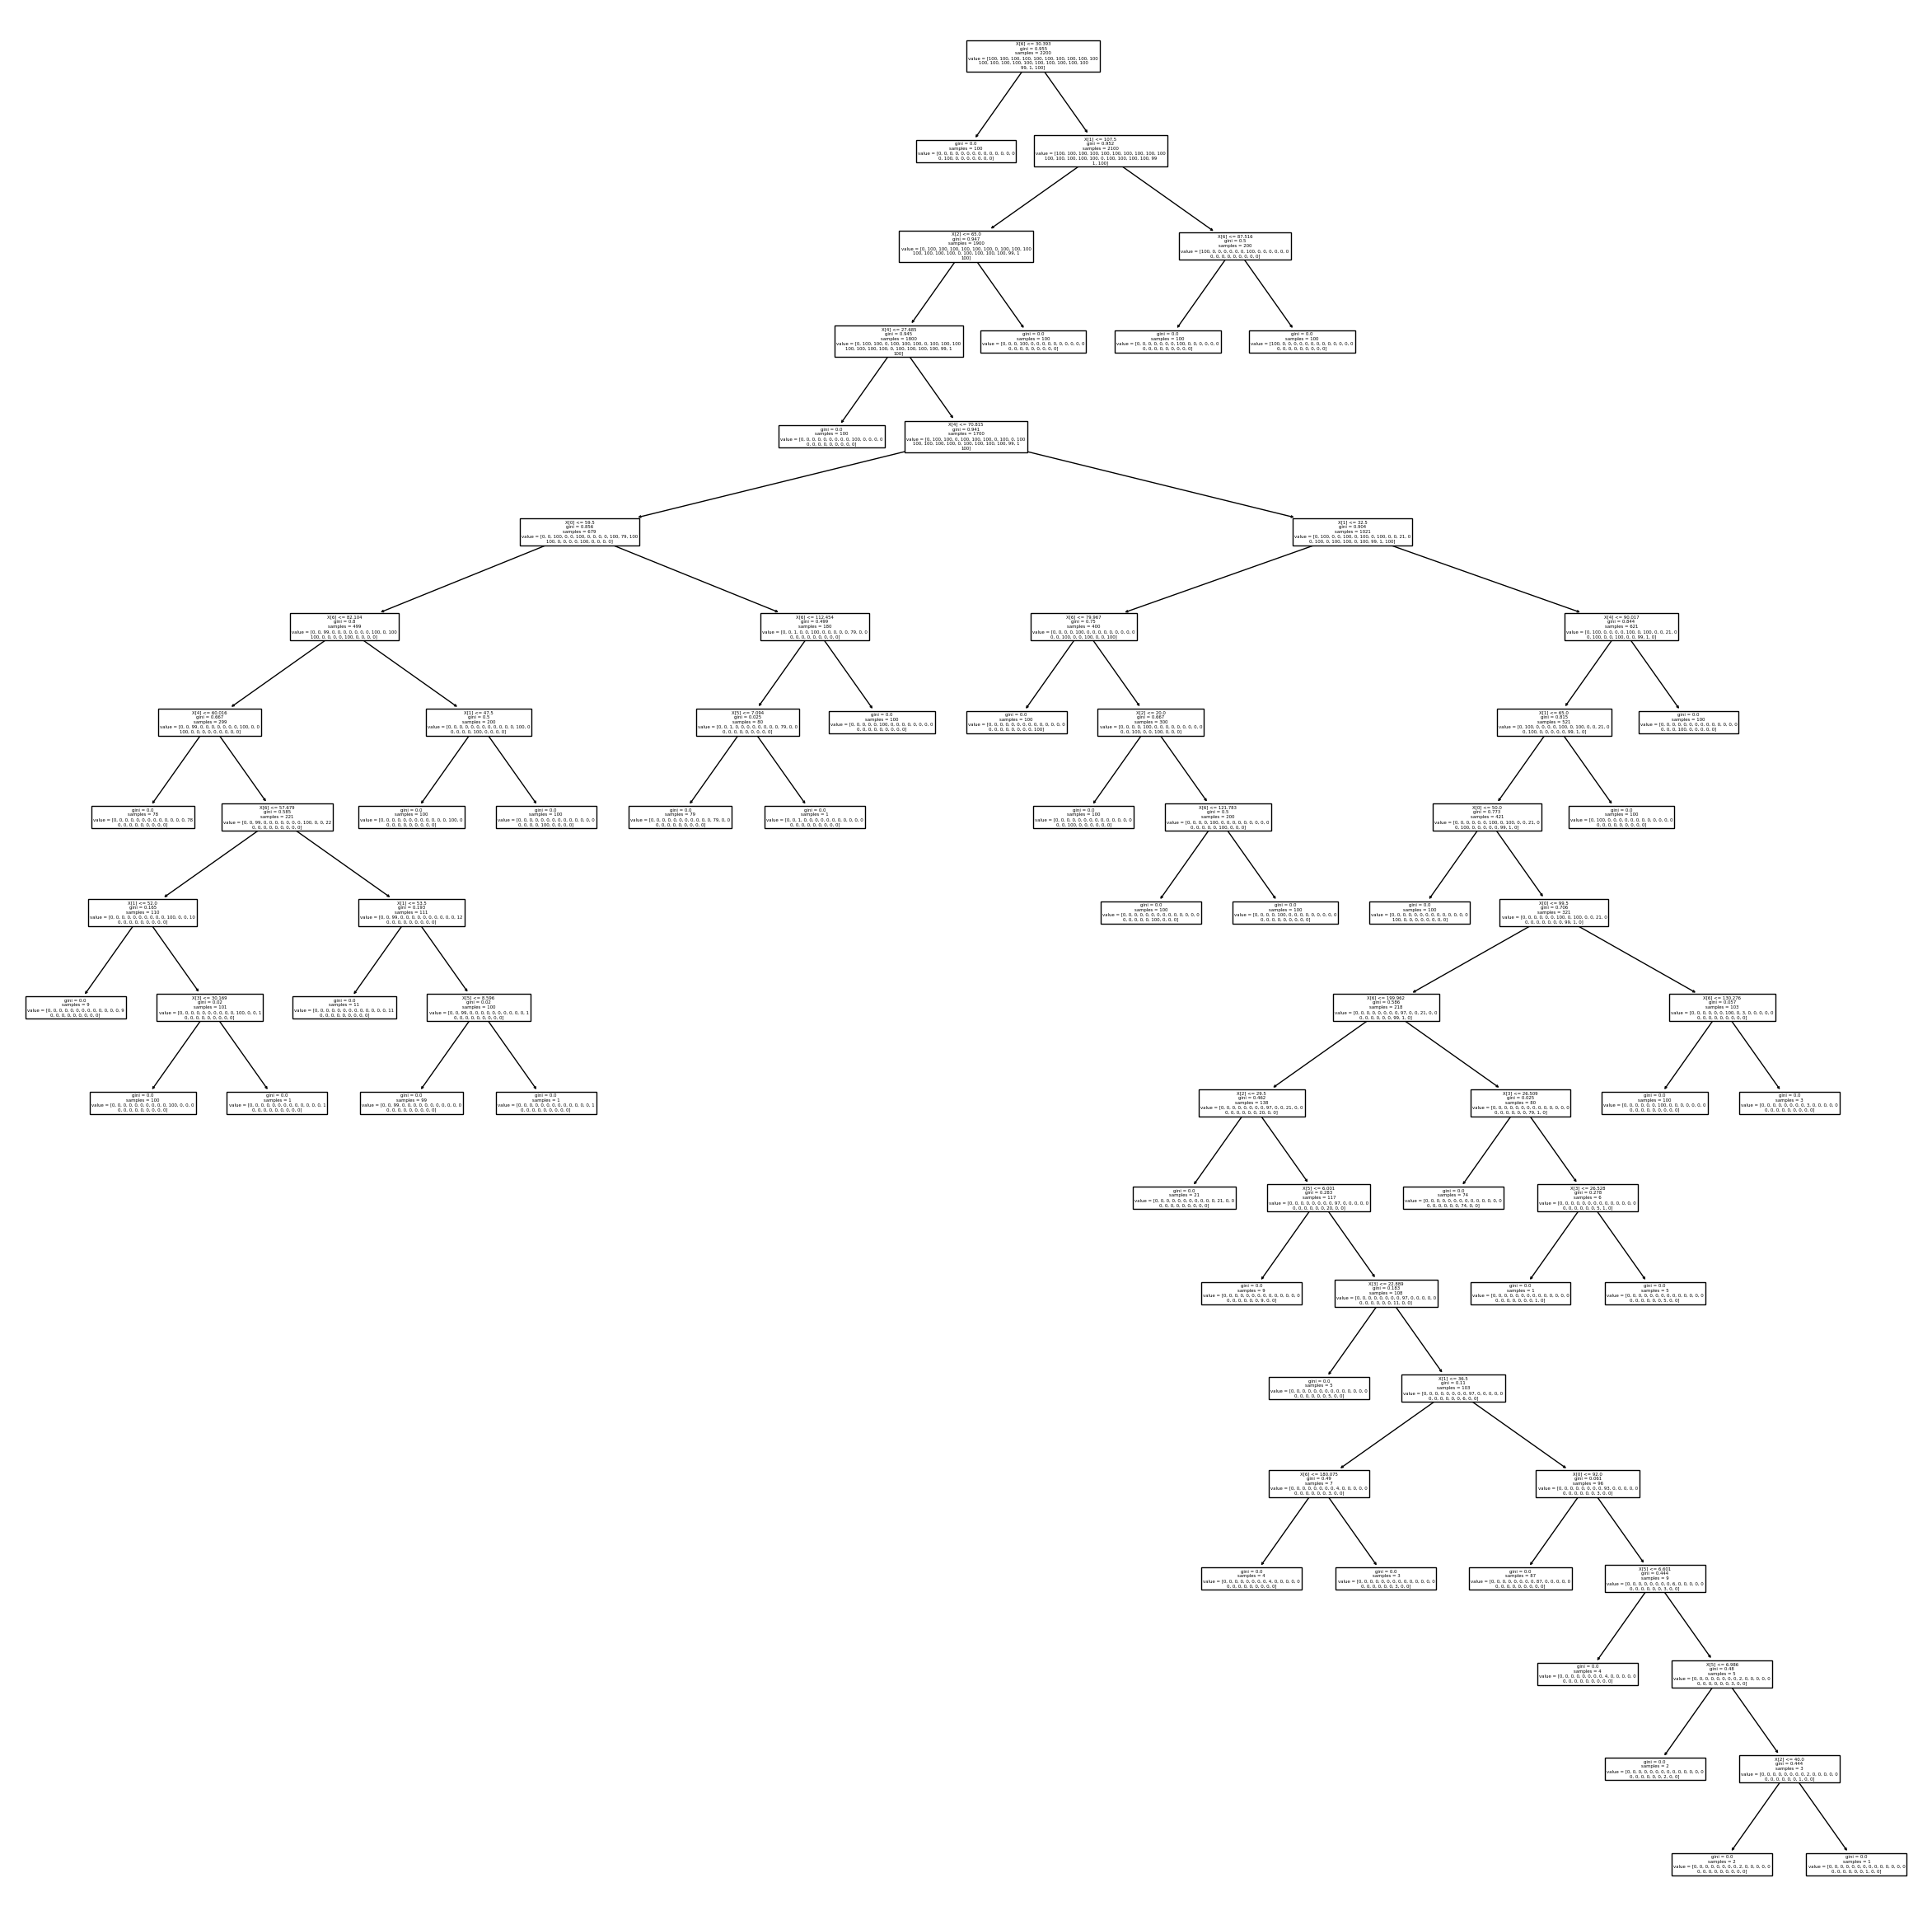

In [13]:
plt.figure(figsize=(30, 30))
plot_tree(dct)
plt.show()

#### 2.2.5 Check Predictions

In [14]:
#Count the number of correctly labelled predictions
count = 0
for index, row in tree_df.iterrows():
    if row['label'] == row['prediction']:
        count += 1
print("Correct Predictions: {count:d}/{total:d} ({rate:.2f})".format(count=count, total=len(tree_df), rate=count/len(tree_df)))

Correct Predictions: 2200/2200 (1.00)
